In [1]:
# -*- coding:utf-8 -*-
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn import model_selection, preprocessing, metrics
import warnings
import datetime
import os
warnings.filterwarnings("ignore")
print(os.listdir("E:/tianchisaialibaba/tianjinnan"))

['jinnan_round1_submit_20181227.csv', 'jinnan_round1_testA_20181227.csv', 'jinnan_round1_train_20181227.csv', 'jinnan_round1_train_20181227_11.csv', 'sub_val_0.8768794191700493.csv', 'sub_XGB{}.csv']


In [2]:
time_datas = ['A5','A7','A9','A11','A14','A16','A20','A24','A26','A28','B4','B5','B7','B9','B10','B11']
time_datas2 =  ['A5','A7','A9','A11','A14','A16','A24','A26','B5','B7']
time_datas1 =  ['A20','A28','B4','B9','B10','B11'] 

In [3]:
df_train = pd.read_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_train_20181227.csv',encoding = 'gb18030')#,parse_dates=time_datas)
df_test = pd.read_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_testA_20181227.csv',encoding = 'gb18030')#,encoding='latin-1')#,parse_dates=time_datas)

In [4]:
df_train .head()

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B6,B7,B8,B9,B10,B11,B12,B13,B14,收率
0,sample_1528,300,NaN,405.0,700,13:30:00,38.0,NaN,NaN,15:30:00,...,65,11:30:00,45.0,11:30-13:00,14:00-15:30,NaN,800.0,0.15,400,0.879
1,sample_1698,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,80,6:00:00,45.0,6:00-7:30,7:30-9:00,9:00-10:00,1200.0,0.15,400,0.902
2,sample_639,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,80,1:00:00,45.0,1:00-2:30,2:30-4:00,4:00-5:00,1200.0,0.15,400,0.936
3,sample_483,300,NaN,405.0,700,1:30:00,38.0,NaN,NaN,3:00:00,...,65,18:00:00,45.0,19:00-20:30,21:30-23:00,NaN,800.0,0.15,400,0.902
4,sample_617,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,...,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.983


In [5]:
time = 'A5'

In [6]:
for i in time_datas2:
    df_train1  = df_train[df_train[i].str.len()>10][i]
    print(df_train1)

386     1900/1/21 0:00
586     1900/1/29 0:00
1140    1900/1/21 0:00
Name: A5, dtype: object
Series([], Name: A7, dtype: object)
314    1900/1/9 7:00
Name: A9, dtype: object
1320    1900/1/1 2:30
Name: A11, dtype: object
Series([], Name: A14, dtype: object)
998    1900/1/12 0:00
Name: A16, dtype: object
Series([], Name: A24, dtype: object)
700    1900/3/13 0:00
Name: A26, dtype: object
Series([], Name: B5, dtype: object)
Series([], Name: B7, dtype: object)


In [7]:
a=df_train['A1'].count()
a

1396

In [8]:
import seaborn as sns
plt.style.use('seaborn')

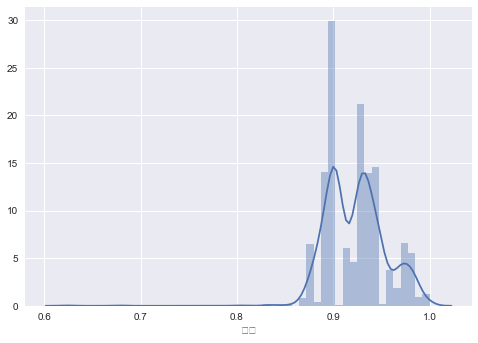

In [9]:
sns.distplot(df_train['收率'].clip(0.6,1))
plt.show()

In [10]:
df_1 =df_train.groupby(['收率']).agg('min')

In [11]:
df_1.head()

,样本id,A1,A2,A3,A4,A5,A6,A8,A9,A10,...,B2,B3,B4,B6,B7,B8,B9,B12,B13,B14
收率,,,,,,,,,,,,,,,,,,,,,
0.624,sample_842,300,125.0,NaN,980,14:30:00,24.0,NaN,16:00:00,100,...,3.5,3.5,2:00-3;00,60,6:00:00,40.0,9:00-10:30,800.0,0.15,280
0.677,sample_293,300,125.0,NaN,980,15:00:00,21.0,NaN,16:00:00,100,...,3.5,3.5,4:30-5:30,60,7:30:00,40.0,12:30-14:00,800.0,0.15,400
0.803,sample_752,300,NaN,405.0,700,20:00:00,28.0,NaN,22:00:00,100,...,3.5,3.5,8:00-9:00,80,11:00:00,45.0,11:00-4:00,1200.0,0.15,380
0.834,sample_750,300,125.0,405.0,700,2:00:00,21.0,NaN,4:00:00,100,...,3.5,3.5,10:00-11:00,65,13:00:00,40.0,13:00-14:30,800.0,0.15,370
0.846,sample_748,300,NaN,405.0,700,15:00:00,30.0,NaN,17:00:00,103,...,3.5,3.5,23:00-0:00,80,2:00:00,45.0,2:00-17:00,1200.0,0.15,400


In [12]:
df_test['A28'][16]

'14；00-14:30'

In [13]:
a=[]
def group_battery(x):
    #x = x.lower()
    for i in list(x):
         if ';' == i:
            return ':'
         else:
            return i
    a= a.append(i)
    return a
    
#df_test['A28'] = df_test['A28'].apply(group_battery)

In [14]:
df_test['A28'][16]

'14；00-14:30'

In [15]:
#under_1 = df_train.loc[df_train['A7'] < 1, 'A7'].count()
#print("Under 1:", under_1, "values.")

In [16]:
for column in df_train.select_dtypes(include=['float','int']):
    if df_train[column].min() == 0 and df_train[column].max() == 1 :
        print(column)

In [17]:
nans = []
pcts = []
for cols in df_train:
    nans.append(df_train[cols].isnull().sum())
    pcts.append(df_train[cols].isnull().sum()/df_train.shape[0]*100)

In [18]:
missing_data = pd.DataFrame({"Col":df_train.columns,"Missing values": nans, "Pct missing [%]": pcts}).sort_values("Missing values", ascending=False)
missing_data[missing_data["Missing values"]!=0].reset_index(drop=True)

,Col,Missing values,Pct missing [%]
0,A2,1354,96.991404
1,A7,1247,89.326648
2,A8,1247,89.326648
3,B11,849,60.816619
4,B10,244,17.478510
5,A3,42,3.008596
6,B1,10,0.716332
7,A23,3,0.214900
8,A21,3,0.214900
9,B2,2,0.143266


There are:
39 columns without missing values
12 columns with less than 10% of missing values
 1 columns withmissing values between 10% and 50%
 4 columns with more than 50% of missing values


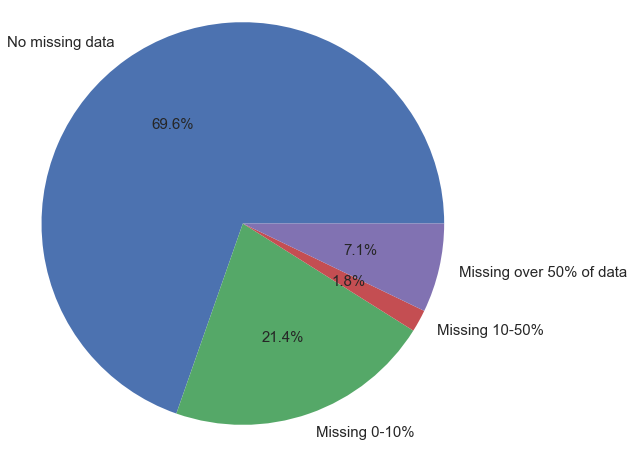

In [19]:
complete = (missing_data["Pct missing [%]"]<=10).sum()
a = ((missing_data["Pct missing [%]"]!=0) & (missing_data["Pct missing [%]"]<=10)).sum()
b = ((missing_data["Pct missing [%]"]>10) & (missing_data["Pct missing [%]"]<=50)).sum()
c = (missing_data["Pct missing [%]"]>50).sum()
print("There are:\n{} columns without missing values\n{} columns with less than 10% of missing values\n {} columns withmissing values between 10% and 50%\n {} columns with more than 50% of missing values".format(complete,a,b,c))

labels =["No missing data", "Missing 0-10%", "Missing 10-50%", "Missing over 50% of data"]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie([complete,a,b,c],autopct='%1.1f%%',labels=labels, textprops={'fontsize': 15})
ax1.axis('equal')
plt.show()

In [20]:
#detect_no = (df_train["HasDetections"]==0).sum()
#detect_yes = (df_train["HasDetections"]==1).sum()#print(detect_no,detect_yes)

In [21]:
train = df_train

In [22]:
def my_graphs1(col_name, rotation=45, threshold=0.01, explode =-1):
    category = train[col_name].unique().tolist()
    totals=[]
    infected=[]
    
    for item in category:
        a = (train[col_name]==item).sum()
        totals.append(a)
        infected.append((train[train[col_name]==item]["HasDetections"]==1).sum()/a)
        
    #creating a summary dataframe
    df = pd.DataFrame({"Total":totals,"Infected": infected}, index=category).sort_values("Total", ascending=False) 
    fig, ax = plt.subplots(ncols=2, nrows=1,figsize=(20,8))
    
    #creating a pie chart with conditional explode option
    threshold = train.shape[0]*threshold

    if explode==-1:
        ax[0].pie(df[df["Total"]>threshold]["Total"], labels=df[df["Total"]>threshold].index.values, autopct='%1.1f%%',shadow=False, startangle=rotation, textprops={'fontsize': 15})
    else:
        ax[0].pie(df[df["Total"]>threshold]["Total"], labels=df[df["Total"]>threshold].index.values, autopct='%1.1f%%',shadow=False, startangle=rotation, textprops={'fontsize': 15}, explode=explode)
    ax[0].axis('equal')
    ax[0].set_title(col_name)
    
    #created a sorted bar chart
    df.sort_values("Infected", ascending=False, inplace=True)
    ax[1].set_xticklabels(category,rotation=45, horizontalalignment='right')
    ax[1].set_title('Infected fractions')
    ax[1] = sns.barplot(x=df.index, y="Infected",data=df)
    plt.show()

In [23]:
#my_graphs1("A5",45,(0.5,0,0,0))

In [24]:
#df_train_col_names =df_train.columns.values

In [25]:
#df_train_missing = df_train[df_train.isnull()[time_datas]]
#idx_test_missing = df_train_missing.index
#df_train_missing

In [26]:
df_train.head()

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B6,B7,B8,B9,B10,B11,B12,B13,B14,收率
0,sample_1528,300,NaN,405.0,700,13:30:00,38.0,NaN,NaN,15:30:00,...,65,11:30:00,45.0,11:30-13:00,14:00-15:30,NaN,800.0,0.15,400,0.879
1,sample_1698,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,80,6:00:00,45.0,6:00-7:30,7:30-9:00,9:00-10:00,1200.0,0.15,400,0.902
2,sample_639,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,80,1:00:00,45.0,1:00-2:30,2:30-4:00,4:00-5:00,1200.0,0.15,400,0.936
3,sample_483,300,NaN,405.0,700,1:30:00,38.0,NaN,NaN,3:00:00,...,65,18:00:00,45.0,19:00-20:30,21:30-23:00,NaN,800.0,0.15,400,0.902
4,sample_617,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,...,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.983


In [27]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
#df_train.head(1)

In [28]:
df_test1 = df_test

In [29]:
puncts = '；'
def clean_text_1(x):

    x = str(x)
    #for punct in puncts:
    x = x.replace(puncts, ':')
    return x

In [30]:
for i in time_datas:
    df_train[i] = df_train[i].apply(lambda x: clean_text_1(x))
    df_test[i] = df_test[i].apply(lambda x: clean_text_1(x))
#test["question_text"] = test["question_text"].apply(lambda x: clean_text(x))

In [31]:
#df_test['B4']=df_test['B4'].map(lambda x: clean_text_1(x))

In [32]:
df_test['B4'][122]

'12:30-13:30'

In [33]:
#df_test.to_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_train_20181227_11.csv',index=False)

In [34]:
df_test['A5'][86]='22:00'
df_test['A28'][16]='14:00-14:30'
df_test['A28'][59]='13:00-14:00'
df_test['A28'][79]='21:00-22:00'
df_test['A28'][124]='13:00-14:00'
df_test['B4'][122]='12:30-13:30'
df_test['B9'][68]='16:00-19:30'

In [35]:
df_test['B4'][97]='20:00-22:00'

In [36]:
df_test['A5'][86]

'22:00'

In [37]:
df_test['A28'][16]

'14:00-14:30'

In [38]:
#df_test.to_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_train_20181227_11.csv',index=False)

In [39]:
for i in time_datas1:
    df_train[i+'-1'], df_train[i+'-2'] = df_train[i].str.split('-', 1).str
    df_test[i+'-1'], df_test[i+'-2'] = df_test[i].str.split('-', 1).str

In [40]:
df_train.head(1)

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A28-1,A28-2,B4-1,B4-2,B9-1,B9-2,B10-1,B10-2,B11-1,B11-2
0,sample_1528,300,0.0,405.0,700,13:30:00,38.0,0,0.0,15:30:00,...,6:30,7:00,7:00,8:00,11:30,13:00,14:00,15:30,0,NaN


In [41]:
for i in time_datas2:
    df_train[i+'-1'], df_train[i+'-2'],df_train[i+'-3'] = df_train[i].str.split(':', 2).str   
    df_test[i+'-1'], df_test[i+'-2'],df_test[i+'-3'] = df_test[i].str.split(':', 2).str   

In [42]:
time_datas3 =  ['A20-1','A20-2','A28-1','B4-1','B9-1','B10-1','B11-1','A28-2','B4-2','B9-2','B10-2','B11-2'] 

In [43]:
for i in time_datas3:
    df_train[i+'-1'], df_train[i+'-2']= df_train[i].str.split(':', 1).str 
    df_test[i+'-1'], df_test[i+'-2']= df_test[i].str.split(':', 1).str 

In [44]:
#df_trainx = df_train.drop(time_datas,axis=1)

In [45]:
#df_trainx = df_trainx.drop(time_datas3,axis=1)

In [46]:
col_values = df_train.columns.values
col_values

array(['样本id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18',
       'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
       'A28', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12', 'B13', 'B14', '收率', 'A20-1', 'A20-2', 'A28-1',
       'A28-2', 'B4-1', 'B4-2', 'B9-1', 'B9-2', 'B10-1', 'B10-2', 'B11-1',
       'B11-2', 'A5-1', 'A5-2', 'A5-3', 'A7-1', 'A7-2', 'A7-3', 'A9-1',
       'A9-2', 'A9-3', 'A11-1', 'A11-2', 'A11-3', 'A14-1', 'A14-2',
       'A14-3', 'A16-1', 'A16-2', 'A16-3', 'A24-1', 'A24-2', 'A24-3',
       'A26-1', 'A26-2', 'A26-3', 'B5-1', 'B5-2', 'B5-3', 'B7-1', 'B7-2',
       'B7-3', 'A20-1-1', 'A20-1-2', 'A20-2-1', 'A20-2-2', 'A28-1-1',
       'A28-1-2', 'B4-1-1', 'B4-1-2', 'B9-1-1', 'B9-1-2', 'B10-1-1',
       'B10-1-2', 'B11-1-1', 'B11-1-2', 'A28-2-1', 'A28-2-2', 'B4-2-1',
       'B4-2-2', 'B9-2-1', 'B9-2-2', 'B10-2-1', 'B10-2-2', 'B11-2-1',
       '

In [47]:
#df_trainx.rename(columns={'Ñù±¾id':'id', 'ÊÕÂÊ':'Target'}, inplace = True)
#df_test.rename(columns={'Ñù±¾id':'id'}, inplace = True)

In [48]:
#time_datas4 = ['A5-1', 'A5-2', 'A5-3', 'A7-1', 'A7-2', 'A7-3', 'A9-1', 'A9-2', 'A9-3',
  #     'A11-1', 'A11-2', 'A11-3', 'A14-1', 'A14-2', 'A14-3', 'A16-1',
      # 'A16-2', 'A16-3', 'A24-1', 'A24-2', 'A24-3', 'A26-1', 'A26-2',
     #  'A26-3', 'B5-1', 'B5-2', 'B5-3', 'B7-1', 'B7-2', 'B7-3', 'A20-1-1',
      # 'A20-1-2', 'A20-2-1', 'A20-2-2', 'A28-1-1', 'A28-1-2', 'B4-1-1',
      # 'B4-1-2', 'B9-1-1', 'B9-1-2', 'B10-1-1', 'B10-1-2', 'B11-1-1',
       #'B11-1-2', 'A28-2-1', 'A28-2-2', 'B4-2-1', 'B4-2-2', 'B9-2-1',
       #'B9-2-2', 'B10-2-1', 'B10-2-2', 'B11-2-1', 'B11-2-2']

In [49]:
#time_datas_1 = ['A5-1','A7-1', 'A9-1', 'A11-1',  'A14-1', 'A16-1',
     #  'A24-1', 'A26-1','B5-1', 'B7-1','A20-1-1',
     # 'A20-2-1',  'A28-1-1', 'B4-1-1', 'B9-1-1',  'B10-1-1', 'B11-1-1',
       # 'A28-2-1',  'B4-2-1',  'B9-2-1', 'B10-2-1', 'B11-2-1']

In [50]:
#time_datas_2 = [ 'A5-2', 'A7-2','A9-2', 'A11-2', 'A14-2', 'A16-2',  'A24-2', 'A26-2',
        #'B5-2',  'B7-2', 'A20-1-2', 'A20-2-2',  'A28-1-2','B4-1-2', 'B9-1-2', 'B10-1-2',
     #  'B11-1-2', 'A28-2-2', 'B4-2-2','B9-2-2','B10-2-2', 'B11-2-2']

In [51]:
g1 = df_train.iloc[314]['A9']
g2 = df_train.loc[386]['A5']
g3 = df_train.loc[586]['A5']
g4 = df_train.loc[1140]['A5']
g5 = df_train.loc[1304]['A25']
g6 = df_train.loc[998]['A16']

In [52]:
print(g1,g2,g3,g4,g5,g6)

1900/1/9 7:00 1900/1/21 0:00 1900/1/29 0:00 1900/1/21 0:00 1900/3/10 0:00 1900/1/12 0:00


In [53]:
drop_indexs1 = np.array([314,386,586,1140,1304,998])

In [54]:
for i in drop_indexs1:
    df_train = df_train.drop(i)

In [55]:
df_train = df_train.reset_index(drop=True)
#df_train.to_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_train_20181227_10.csv',index=False)

In [56]:
#df_train.sort_values(by='B11-2-1',ascending=True,na_position='first').reset_index(drop=True)

In [57]:
#def str_data(df):
   # a=[]
   # b=str(';')
   # c=str(':')
   # for i in list(df):
       #  if i in b :
           #     i=c
       # a=i.append(i)
    #return a

In [58]:
#mask = df_train['B4-2-1'].apply(lambda x:str_data(df_train['B4-2-1']))

In [59]:
a=filter(lambda f:f.startswith('1900/1/2'),df_train['A5'])
a

In [60]:
#用平均值填充 异常值 mean()

In [61]:
drop_indexs2 = np.array([1313,962,856,795,782,767,197,141,1120,1286,1225,1121,768,835,783,1102,963,697,857,814,1126,1178,1187,796,
                         1101,955,834,460,237,212,65,1074,813,357,638,597,1277,342,1075,1314])

In [62]:
for i in drop_indexs2:
    df_train = df_train.drop(i)

In [63]:
df_train = df_train.reset_index(drop=True)

In [64]:
#df_train = df_train.fillna(0)

In [65]:
#df_train.head()

In [66]:
sorted('1900/1/21 0:00')

[' ', '/', '/', '0', '0', '0', '0', '0', '1', '1', '1', '2', '9', ':']

In [67]:
#for i in time_datas4 :
 #   for j in np.array(range(1389)):# df_trainx[i][j]=str(df_trainx[i][j])
        #if len(df_trainx[i][j])>2:
      #      df_trainx = df_trainx.drop(j)

In [68]:
df_test.shape

(150, 109)

In [69]:
#df_train.describe()

In [70]:
#df_train.to_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_train_20181227_10.csv',index=False)

In [71]:
del df_train['A5-3'],df_train['A7-3'],df_train['A9-3'],df_train['A11-3'],df_train['A14-3']
del df_train[ 'A16-3'],df_train['A24-3'],df_train['A26-3'],df_train['B5-3'],df_train['B7-3']
del df_train[ 'A20-1'],df_train[ 'A20-2'],df_train['A28-1'],df_train[ 'B4-1'],df_train[ 'B4-2'],df_train[ 'A28-2']
del df_train[ 'B9-1'],df_train[ 'B9-2'],df_train[ 'B10-1'],df_train[ 'B10-2'],df_train[ 'B11-1'],df_train[ 'B11-2']
del df_test['A5-3'],df_test['A7-3'],df_test['A9-3'],df_test['A11-3'],df_test['A14-3']
del df_test[ 'A16-3'],df_test['A24-3'],df_test['A26-3'],df_test['B5-3'],df_test['B7-3']
del df_test[ 'A20-1'],df_test[ 'A20-2'],df_test['A28-1'],df_test[ 'B4-1'],df_test[ 'B4-2'],df_test[ 'A28-2']
del df_test[ 'B9-1'],df_test[ 'B9-2'],df_test[ 'B10-1'],df_test[ 'B10-2'],df_test[ 'B11-1'],df_test[ 'B11-2']

In [72]:
df_train.head()

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A28-2-1,A28-2-2,B4-2-1,B4-2-2,B9-2-1,B9-2-2,B10-2-1,B10-2-2,B11-2-1,B11-2-2
0,sample_1528,300,0.0,405.0,700,13:30:00,38.0,0,0.0,15:30:00,...,7,00,8,00,13,00,15,30,NaN,NaN
1,sample_1698,300,0.0,405.0,700,14:00:00,29.0,0,0.0,16:00:00,...,22,00,23,00,7,30,9,00,10,00
2,sample_639,300,0.0,405.0,700,14:00:00,29.0,0,0.0,16:00:00,...,22,00,23,00,2,30,4,00,5,00
3,sample_483,300,0.0,405.0,700,1:30:00,38.0,0,0.0,3:00:00,...,14,30,15,30,20,30,23,00,NaN,NaN
4,sample_617,300,0.0,405.0,700,22:00:00,29.0,0,0.0,0:00:00,...,6,00,7,00,10,30,12,00,13,00


In [73]:
col_tinme = [df_train.columns.values]
col_tinme

[array(['样本id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
        'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18',
        'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
        'A28', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
        'B11', 'B12', 'B13', 'B14', '收率', 'A5-1', 'A5-2', 'A7-1', 'A7-2',
        'A9-1', 'A9-2', 'A11-1', 'A11-2', 'A14-1', 'A14-2', 'A16-1',
        'A16-2', 'A24-1', 'A24-2', 'A26-1', 'A26-2', 'B5-1', 'B5-2',
        'B7-1', 'B7-2', 'A20-1-1', 'A20-1-2', 'A20-2-1', 'A20-2-2',
        'A28-1-1', 'A28-1-2', 'B4-1-1', 'B4-1-2', 'B9-1-1', 'B9-1-2',
        'B10-1-1', 'B10-1-2', 'B11-1-1', 'B11-1-2', 'A28-2-1', 'A28-2-2',
        'B4-2-1', 'B4-2-2', 'B9-2-1', 'B9-2-2', 'B10-2-1', 'B10-2-2',
        'B11-2-1', 'B11-2-2'], dtype=object)]

In [74]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [75]:
#df_test.to_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_train_20181227_11.csv',index=False)

In [76]:
#df_train['A7'] = df_train['A7'].apply(str)
#df_train['A7'][np.isnan(df_train['A7'])] = 0

In [77]:
time_cols10 = ['A5-1', 'A5-2', 'A7-1', 'A7-2', 'A9-1', 'A9-2', 'A11-1',
        'A11-2', 'A14-1', 'A14-2', 'A16-1', 'A16-2', 'A24-1', 'A24-2',
        'A26-1', 'A26-2', 'B5-1', 'B5-2', 'B7-1', 'B7-2', 'A20-1-1',
        'A20-1-2', 'A20-2-1', 'A20-2-2', 'A28-1-1', 'A28-1-2', 'B4-1-1',
        'B4-1-2', 'B9-1-1', 'B9-1-2', 'B10-1-1', 'B10-1-2', 'B11-1-1',
        'B11-1-2', 'A28-2-1', 'A28-2-2', 'B4-2-1', 'B4-2-2', 'B9-2-1',
        'B9-2-2', 'B10-2-1', 'B10-2-2', 'B11-2-1', 'B11-2-2','A25']

In [78]:
#df_train[ 'B10-1-2'][932]# ['A20','A28','B4','B9','B10','B11'] 

In [79]:
drop_indexs3 = np.array([1241,1249,1190,932])
#drop_indexs_test = np.array([16,68,79,97,124,59,86])

In [80]:
for i in drop_indexs3:
    df_train = df_train.drop(i)

In [81]:
#df_test['A5-1'][86]

In [82]:
#df_test['A28-1-1'][16]

In [83]:
for i in time_cols10:
    df_train[i] = df_train[i].apply(float)
    df_test[i] = df_test[i].apply(float)

ValueError: could not convert string to float: '11;30'

In [ ]:
#df_train[i] = df_train[i].apply(float)

In [84]:
#df_train = df_train.fillna(0)

In [85]:
#df_train.head()

In [86]:
df_train['A5'] = df_train['A5-1']*60 +df_train['A5-2']
df_train['A7'] = df_train['A7-1']*60 +df_train['A7-2']
df_train['A9'] = df_train['A9-1']*60 +df_train['A9-2']
df_train['A14'] = df_train['A14-1']*60 +df_train['A14-2']
df_train['A16'] = df_train['A16-1']*60 +df_train['A16-2']
df_train['A24'] = df_train['A24-1']*60 +df_train['A24-2']
df_train['A26'] = df_train['A26-1']*60 +df_train['A26-2']
df_train['B5'] = df_train['B5-1']*60 +df_train['B5-2']
df_train['B7'] = df_train['B7-1']*60 +df_train['B7-2']
df_train['A11'] = df_train['A11-1']*60 +df_train['A11-2']

In [66]:
df_test['A5'] = df_test['A5-1']*60 +df_test['A5-2']
df_test['A7'] = df_test['A7-1']*60 +df_test['A7-2']
df_test['A9'] = df_test['A9-1']*60 +df_test['A9-2']
df_test['A14'] = df_test['A14-1']*60 +df_test['A14-2']
df_test['A16'] = df_test['A16-1']*60 +df_test['A16-2']
df_test['A24'] = df_test['A24-1']*60 +df_test['A24-2']
df_test['A26'] = df_test['A26-1']*60 +df_test['A26-2']
df_test['B5'] = df_test['B5-1']*60 +df_test['B5-2']
df_test['B7'] = df_test['B7-1']*60 +df_test['B7-2']
df_test['A11'] = df_test['A11-1']*60 +df_test['A11-2']

In [67]:
time_drop = ['A5-1', 'A5-2', 'A7-1', 'A7-2', 'A9-1', 'A9-2', 'A11-1',
        'A11-2', 'A14-1', 'A14-2', 'A16-1', 'A16-2', 'A24-1', 'A24-2',
        'A26-1', 'A26-2', 'B5-1', 'B5-2', 'B7-1', 'B7-2']

In [68]:
for i in time_drop:
    del df_train[i],df_test[i]

In [69]:
df_train['A20-1'] = df_train['A20-1-1']*60 +df_train['A20-1-2']
df_train['A20-2'] = df_train['A20-2-1']*60 +df_train['A20-2-2']
df_train['A28-1'] = df_train['A28-1-1']*60 +df_train['A28-1-2']
df_train['A28-2'] = df_train['A28-2-1']*60 +df_train['A28-2-2']
df_train['B4-1'] = df_train['B4-1-1']*60 +df_train['B4-1-2']
df_train['B4-2'] = df_train['B4-2-1']*60 +df_train['B4-2-2']
df_train['B9-1'] = df_train['B9-1-1']*60 +df_train['B9-1-2']
df_train['B9-2'] = df_train['B9-2-1']*60 +df_train['B9-2-2']
df_train['B10-1'] = df_train['B10-1-1']*60 +df_train['B10-1-2']
df_train['B10-2'] = df_train['B10-2-1']*60 +df_train['B10-2-2']
df_train['B11-1'] = df_train['B11-1-1']*60 +df_train['B11-1-2']
df_train['B11-2'] = df_train['B11-2-1']*60 +df_train['B11-2-2']

In [70]:
df_test['A20-1'] = df_test['A20-1-1']*60 +df_test['A20-1-2']
df_test['A20-2'] = df_test['A20-2-1']*60 +df_test['A20-2-2']
df_test['A28-1'] = df_test['A28-1-1']*60 +df_test['A28-1-2']
df_test['A28-2'] = df_test['A28-2-1']*60 +df_test['A28-2-2']
df_test['B4-1'] = df_test['B4-1-1']*60 +df_test['B4-1-2']
df_test['B4-2'] = df_test['B4-2-1']*60 +df_test['B4-2-2']
df_test['B9-1'] = df_test['B9-1-1']*60 +df_test['B9-1-2']
df_test['B9-2'] = df_test['B9-2-1']*60 +df_test['B9-2-2']
df_test['B10-1'] = df_test['B10-1-1']*60 +df_test['B10-1-2']
df_test['B10-2'] = df_test['B10-2-1']*60 +df_test['B10-2-2']
df_test['B11-1'] = df_test['B11-1-1']*60 +df_test['B11-1-2']
df_test['B11-2'] = df_test['B11-2-1']*60 +df_test['B11-2-2']

In [71]:
time_drop1 = [ 'A20-1-1',
        'A20-1-2', 'A20-2-1', 'A20-2-2', 'A28-1-1', 'A28-1-2', 'B4-1-1',
        'B4-1-2', 'B9-1-1', 'B9-1-2', 'B10-1-1', 'B10-1-2', 'B11-1-1',
        'B11-1-2', 'A28-2-1', 'A28-2-2', 'B4-2-1', 'B4-2-2', 'B9-2-1',
        'B9-2-2', 'B10-2-1', 'B10-2-2', 'B11-2-1', 'B11-2-2']

In [72]:
for i in time_drop1:
    del df_train[i],df_test[i]

In [73]:
#df_train.head()

In [74]:
df_train['A20'] =  df_train['A20-2']- df_train['A20-1']
df_train['A28'] =  df_train['A28-2']-df_train['A28-1']
df_train['B4'] =  df_train['B4-2']-df_train['B4-1']
df_train['B9'] =  df_train['B9-2']-df_train['B9-1'] 
df_train['B10'] =   df_train['B10-2']-df_train['B10-1']
df_train['B11'] = df_train['B11-2']- df_train['B11-1'] 

In [75]:
df_test['A20'] =  df_test['A20-2']- df_test['A20-1']
df_test['A28'] =  df_test['A28-2']-df_test['A28-1']
df_test['B4'] =  df_test['B4-2']-df_test['B4-1']
df_test['B9'] =  df_test['B9-2']-df_test['B9-1'] 
df_test['B10'] =   df_test['B10-2']-df_test['B10-1']
df_test['B11'] = df_test['B11-2']- df_test['B11-1'] 

In [76]:
df_test['A20'] = df_test['A20'].apply(lambda x: x+1440 if x<0 else x)
df_test['A28'] = df_test['A28'].apply(lambda x: x+1440 if x<0 else x)
df_test['B4'] = df_test['B4'].apply(lambda x: x+1440 if x<0 else x)
df_test['B9'] = df_test['B9'].apply(lambda x: x+1440 if x<0 else x)
df_test['B10'] = df_test['B10'].apply(lambda x: x+1440 if x<0 else x)
df_test['B11'] = df_test['B11'].apply(lambda x: x+1440 if x<0 else x)

In [77]:
df_train['A20'] = df_train['A20'].apply(lambda x: x+1440 if x<0 else x)
df_train['A28'] = df_train['A28'].apply(lambda x: x+1440 if x<0 else x)
df_train['B4'] = df_train['B4'].apply(lambda x: x+1440 if x<0 else x)
df_train['B9'] = df_train['B9'].apply(lambda x: x+1440 if x<0 else x)
df_train['B10'] = df_train['B10'].apply(lambda x: x+1440 if x<0 else x)
df_train['B11'] = df_train['B11'].apply(lambda x: x+1440 if x<0 else x)

In [78]:
train_cols = df_train.columns.values
train_cols

array(['样本id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18',
       'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
       'A28', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12', 'B13', 'B14', '收率', 'A20-1', 'A20-2', 'A28-1',
       'A28-2', 'B4-1', 'B4-2', 'B9-1', 'B9-2', 'B10-1', 'B10-2', 'B11-1',
       'B11-2'], dtype=object)

In [79]:
time_datas_col = ['A5','A7','A9','A11','A14','A16','A20','A24','A26','A28','B4','B5','B7','B9','B10','B11', 'A20-1', 'A20-2', 'A28-1',
       'A28-2', 'B4-1', 'B4-2', 'B9-1', 'B9-2', 'B10-1', 'B10-2', 'B11-1','B11-2']

In [80]:
df_train['A5'].values

array([ 810.,  840.,  840., ...,  840., 1080.,  360.])

In [81]:
for i in time_datas_col:
    df_train[i] = df_train[i]-df_train['A5']
    df_test[i] = df_test[i]-df_test['A5']

In [82]:
#df_train['A14'].values

In [83]:
#df_train.info()

In [84]:
#time_datas_sep = ['A5','A7','A9','A11','A14','A16','A24','A26','B5','B7',
   #              'A20-1', 'A20-2', 'A28-1', 'A28-2', 'B4-1', 'B4-2', 'B9-1', 'B9-2', 'B10-1', 'B10-2', 'B11-1', 'B11-2']

In [85]:
#df_train.to_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_train_20181227_11.csv',index=False)

In [86]:
#df_train = pd.read_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_train_20181227_10.csv',parse_dates=time_datas_sep)

In [87]:
#df_train.head()

In [88]:
#df_train['A9'] = df_train['A9'].apply(lambda x: x+= for i in list(x)[0:y] if len(x)=7 y=4 else y=5)

In [89]:
#time_datas1_2 = []

In [90]:
#df_train.info()

In [91]:
#if len(x)<8:y=4 else:y=5for i in list(x)[:y]: a.append(i)print(a)

In [92]:
#df_train['A9'] = pd.to_datetime(df_train['A9'])

In [93]:
time_datas_sep1 = ['A9','A11','A14','A16','A24','A26','B5','B7',
                 'A20-1', 'A20-2', 'A28-1', 'A28-2', 'B4-1', 'B4-2', 'B9-1', 'B9-2', 'B10-1', 'B10-2', 'B11-1', 'B11-2']

In [94]:
from datetime import timedelta, date

In [95]:
def time_to_data(df):
    for i in time_datas_sep1:
        df[i] = pd.to_datetime(df[i])
    return df

In [96]:
#time_to_data(df_train)

In [97]:
def read_data(df):
    df['A5'] = pd.to_datetime(df['A5'])
    for i in time_datas_sep:
        df[i] = pd.to_datetime(df[i])
        df[i] = (df[i].dt.date - df['A5'].dt.date).dt.minutes
    return df

In [98]:
#for i in time_datas_sep :
  #  df_train[i]=df_train[i].apply(int)

In [99]:
#for i in time_datas_1:
   # for j  in range(1364):
       # if int(df_trainx[i][j]) < int(df_trainx['A5-1'][j]):
            #df_trainx[i][j] = int( df_trainx[i][j] )+24

In [100]:
class_names = df_train.columns.values

In [101]:
df_train.drop_duplicates(inplace=True)

In [102]:
#df_train.describe()

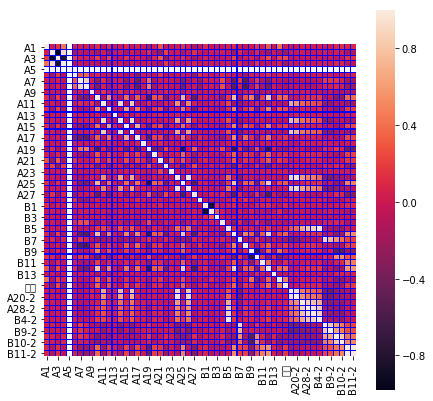

In [103]:
corr=df_train[list(class_names)].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, linewidths=0.05, linecolor='b', square=True)
plt.show()

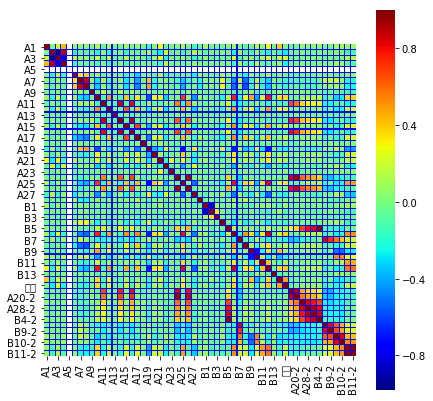

In [104]:
corr=df_train[list(class_names)].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, cmap="jet", linewidths=0.05, linecolor='b', square=True)
plt.show()

In [105]:
#df_train.isnull().sum()

In [106]:
%matplotlib inline
#df_train.channelGrouping.value_counts().plot(kind="bar",title="channelGrouping distro",figsize=(8,8),rot=25,colormap='Paired')

In [107]:
import datetime as datetime
from datetime import timedelta, date
#train_data=df_train

In [108]:
#train_data.head(1)

In [109]:
#"start :{}, end:{}".format(train_data.head(1).A5[0],train_data.head(1).B11[0])

In [110]:
#train_data["A5"] = pd.to_datetime(train_data["A5"])#,format="%Y%m%d")

In [111]:
#split_dates = ['A20','A28','B4','B9','B10','B11']

In [112]:
#df_train.shape

In [113]:
#df_train[col_times] = pd.to_datetime(df_train[col_times])

In [114]:
#pd.to_datetime(data[data['last_O_XLMC']==data['O_XLMC']]['O_SJFCSJ'], 
    #           format='%H:%M:%S')-pd.to_datetime(data['last_O_SJFCSJ'],
    #           format='%H:%M:%S')).dt.total_seconds()

In [115]:
#A9_time==((pd.to_datetime(df_train['B9-2']), format='%H:%M:%S')-pd.to_datetime(df_train['B9-1'],
                                     # format='%H:%M:%S')).dt.total_seconds()

In [116]:
#pd.to_datetime(df_train['B9-2'])==pd.to_datetime(df_train['B9-2'], format='%H:%M')

In [117]:
def change_data(df):
    df1 = df
    df1['first_active_month'] = pd.to_datetime(df['A5'])
    for i in col_times:
        df[i] = pd.to_datetime(df[i])
        df[i] = (df[i].dt.date - df1['first_active_month'].dt.date).dt.days
        df = df[i]
    return df

In [118]:
class_names

array(['样本id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18',
       'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
       'A28', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12', 'B13', 'B14', '收率', 'A20-1', 'A20-2', 'A28-1',
       'A28-2', 'B4-1', 'B4-2', 'B9-1', 'B9-2', 'B10-1', 'B10-2', 'B11-1',
       'B11-2'], dtype=object)

In [119]:
#df_test.head()

In [120]:
#数据可视化分析及中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  
train_x=df_train.drop(['样本id'],axis=1)
train_x=train_x.drop(['收率'],axis=1)
train_Y=df_train['收率']
train_x = train_x.fillna(0)
train_Y = train_Y.fillna(0)
df_test = df_test.drop(['样本id'],axis=1)

In [121]:
#from sklearn.preprocessing import StandardScaler

In [122]:
#ss = StandardScaler()
#train_x = ss.fit_transform(train_x)
#df_test = ss.fit_transform(df_test)

In [123]:
#train_x = pd.DataFrame(train_x)
#df_test = pd.DataFrame(df_test)

In [124]:
print(train_x.shape)
print(df_test.shape)

(1346, 54)
(150, 54)


In [125]:
#train_x.info()

In [126]:
#for col in train_x.columns:
   # sns.distplot(train_x[col])
    #plt.show()

In [127]:
#数据分析
#df_train.info()

In [128]:
#train_x.describe()

In [129]:
#df_test.describe()

In [130]:
#异常数据处理（删除左及右电流小于20A的数据）
#df_train = df_train[df_train['左阴极电流']>20]
#df_train = df_train[df_train['右阴极电流']>20]

In [131]:
 df_train = df_train.drop(528)

In [132]:
#df_train = df_train.drop(['A5'],axis=1)
#df_test = df_test.drop(['A5'],axis =1)

In [133]:
df_train.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28-1,A28-2,B4-1,B4-2,B9-1,B9-2,B10-1,B10-2,B11-1,B11-2
count,1345.000000,1345.000000,1345.000000,1345.000000,1345.0,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,...,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,298.810409,3.717472,391.460967,705.784387,0.0,28.329145,74.342007,7.988104,690.267658,100.881041,...,746.739777,768.063197,753.237918,789.484758,635.368030,712.684015,586.308550,605.278810,306.234201,326.535316
std,10.318465,21.241466,69.855848,53.161909,0.0,6.608885,254.080600,23.839459,420.288842,0.908363,...,408.285267,413.368791,409.861397,414.538292,407.020325,400.807649,456.111563,464.143974,449.285437,470.534820
min,200.000000,0.000000,0.000000,470.000000,0.0,17.000000,0.000000,0.000000,0.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300.000000,0.000000,405.000000,700.000000,0.0,24.000000,0.000000,0.000000,460.000000,100.000000,...,300.000000,360.000000,360.000000,420.000000,300.000000,300.000000,150.000000,190.000000,0.000000,0.000000
50%,300.000000,0.000000,405.000000,700.000000,0.0,29.000000,0.000000,0.000000,660.000000,101.000000,...,780.000000,840.000000,840.000000,900.000000,540.000000,660.000000,630.000000,690.000000,0.000000,0.000000
75%,300.000000,0.000000,405.000000,700.000000,0.0,30.000000,0.000000,0.000000,960.000000,102.000000,...,1170.000000,1140.000000,1110.000000,1110.000000,1020.000000,1110.000000,1080.000000,1080.000000,720.000000,780.000000
max,300.000000,125.000000,405.000000,980.000000,0.0,97.000000,1410.000000,82.000000,1420.000000,103.000000,...,1410.000000,1440.000000,1440.000000,1420.000000,1420.000000,1410.000000,1410.000000,1430.000000,1380.000000,1380.000000


In [134]:
#df_train.to_csv('E:/tianchisaialibaba/tianjinnan/jinnan_round1_train_20181227_10.csv',index=False)

In [135]:
#df_trainY = df_train['左阴极电压']
#df_trainx = df_train.drop(['左阴极电压'],axis=1)
#df_trainx = df_trainx.drop(['时间'],axis=1)

In [136]:
#print(df_trainx.shape)
#print(df_trainY.shape)

In [137]:
#df_trainx.head()

In [138]:
#lightBGM参数设置

In [139]:
param = {'num_leaves': 15,#15,#34
         'min_data_in_leaf': 6, #6
         'objective':'regression',
         'max_depth': -1,#-1#8
         'learning_rate': 0.35,#0.005
         "boosting": "gbdt",
         "feature_fraction": 1,#0.9
         "bagging_freq": 1,
         "bagging_fraction": 0.95,#0.9
         "bagging_seed": 11,
         "metric": 'rmse',
          #'lambda_l1': 0.001,#1.3! #5 #1.2 #1
         'lambda_l2': 0.01,#0.1
         "verbosity": -1}


In [140]:
folds = KFold(n_splits=10, #5
              shuffle=True, random_state=15)
oof = np.zeros(len(train_x))
predictions = np.zeros(len(df_test))

In [141]:
predictions.shape

(150,)

In [142]:
oof.shape

(1346,)

In [143]:
df_train = train_x
target = train_Y

In [144]:
use_cols = [c for c in df_train.columns]
features = list(df_train[use_cols].columns)

df_train[features].head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28-1,A28-2,B4-1,B4-2,B9-1,B9-2,B10-1,B10-2,B11-1,B11-2
0,300,0.0,405.0,700,0.0,38.0,0.0,0.0,930.0,100,...,390.0,420.0,420.0,480.0,690.0,780.0,840.0,930.0,0.0,0.0
1,300,0.0,405.0,700,0.0,29.0,0.0,0.0,960.0,101,...,1260.0,1320.0,1320.0,1380.0,360.0,450.0,450.0,540.0,540.0,600.0
2,300,0.0,405.0,700,0.0,29.0,0.0,0.0,960.0,102,...,1260.0,1320.0,1320.0,1380.0,60.0,150.0,150.0,240.0,240.0,300.0
3,300,0.0,405.0,700,0.0,38.0,0.0,0.0,180.0,100,...,810.0,870.0,870.0,930.0,1140.0,1230.0,1290.0,1380.0,0.0,0.0
4,300,0.0,405.0,700,0.0,29.0,0.0,0.0,0.0,101,...,300.0,360.0,360.0,420.0,540.0,630.0,630.0,720.0,720.0,780.0


In [145]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, target.values)):
    print('-')
    print("Fold {}".format(fold_ + 1))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=50, early_stopping_rounds=100)#100
    

-
Fold 1
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 0.00920502	valid_1's rmse: 0.0231851
[100]	training's rmse: 0.00788607	valid_1's rmse: 0.0232708
Early stopping, best iteration is:
[38]	training's rmse: 0.00977047	valid_1's rmse: 0.0229866
-
Fold 2
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 0.00950994	valid_1's rmse: 0.0150464
[100]	training's rmse: 0.00813626	valid_1's rmse: 0.0154084
Early stopping, best iteration is:
[17]	training's rmse: 0.0121312	valid_1's rmse: 0.0146326
-
Fold 3
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 0.00966297	valid_1's rmse: 0.0250941
[100]	training's rmse: 0.0082763	valid_1's rmse: 0.0256575
Early stopping, best iteration is:
[9]	training's rmse: 0.0137159	valid_1's rmse: 0.0239742
-
Fold 4
Training until validation scores don't improve for 100 rounds.
[50]	training's rmse: 0.00951364	valid_1's rmse: 0.0174272
[100]	training's r

In [146]:
oof[val_idx] = clf.predict(df_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
predictions += clf.predict(df_test[features], num_iteration=clf.best_iteration)# /folds.n_splits

In [147]:
from sklearn.metrics import mean_squared_error
val_score = np.sqrt(mean_squared_error(target, oof))
val_score

0.8768794191700493

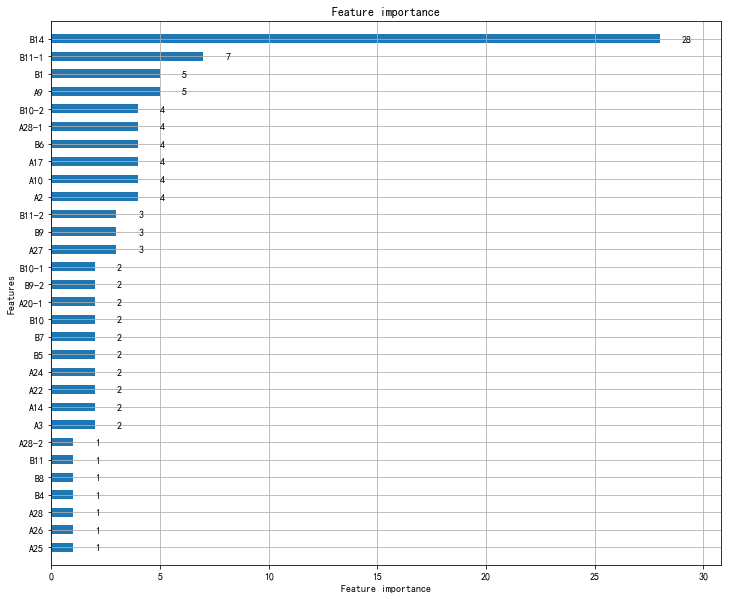

In [148]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(clf, max_num_features=30, height=0.5, ax=ax, title='Feature importance', xlabel='Feature importance', ylabel='Features')
#plt.savefig('E:/tianchisaialibaba/tianjinnan/lgb.png')
plt.show()

In [149]:
#sorted(list(zip(clf.feature_importance(), features)), reverse=True)

In [150]:
df_sub = pd.DataFrame(df_test.values)
df_sub.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,300.0,0.0,405.0,700.0,0.0,29.0,0.0,0.0,480.0,101.0,...,780.0,840.0,840.0,900.0,1020.0,1110.0,1110.0,1200.0,1200.0,1260.0
1,300.0,0.0,405.0,700.0,0.0,39.0,770.0,80.0,860.0,100.0,...,360.0,390.0,390.0,470.0,720.0,780.0,840.0,930.0,0.0,0.0
2,300.0,0.0,405.0,700.0,0.0,80.0,0.0,0.0,480.0,102.0,...,780.0,840.0,840.0,900.0,1020.0,1200.0,0.0,0.0,0.0,0.0
3,300.0,0.0,405.0,700.0,0.0,29.0,0.0,0.0,0.0,102.0,...,300.0,360.0,360.0,420.0,540.0,630.0,630.0,720.0,720.0,780.0
4,300.0,0.0,405.0,700.0,0.0,30.0,0.0,0.0,0.0,101.0,...,300.0,360.0,360.0,420.0,540.0,630.0,630.0,720.0,720.0,780.0


In [151]:
predictions

array([0.92351777, 0.87858657, 0.93387945, 0.91890173, 0.9161644 ,
       0.92090251, 0.92619093, 0.8990504 , 0.93332661, 0.92090251,
       0.96375655, 0.95631103, 0.93188037, 0.96628277, 0.89760028,
       0.91972358, 0.89454918, 0.93047663, 0.95288748, 0.89822855,
       0.91282286, 0.96807614, 0.92140476, 0.94164716, 0.96689096,
       0.93785284, 0.89236863, 0.92090251, 0.9646701 , 0.89327047,
       0.96807614, 0.89677413, 0.89980311, 0.89924088, 0.91972358,
       0.89889144, 0.91890173, 0.972136  , 0.88999032, 0.89321188,
       0.89995581, 0.96243606, 0.96689096, 0.93387945, 0.90801329,
       0.89929764, 0.91282286, 0.89841903, 0.89980311, 0.92090251,
       0.90099196, 0.91972358, 0.88926761, 0.90199614, 0.89199687,
       0.9373    , 0.91972358, 0.89852444, 0.94179611, 0.93785284,
       0.9246967 , 0.96572993, 0.91890173, 0.93945723, 0.94462548,
       0.9246967 , 0.89665717, 0.9320431 , 0.95113377, 0.91890173,
       0.9320431 , 0.97359542, 0.92351777, 0.89711709, 0.91890

In [152]:
#predictions = predictions*5

In [153]:
df_sub= pd.DataFrame(df_test1['样本id'].values)
df_sub["target"] = predictions
df_sub.to_csv("E:/tianchisaialibaba/tianjinnan/sub_val_{}.csv".format(val_score), index=False)

In [154]:
#df_sub2= df_test1['样本id']
#df_sub2 = pd.DataFrame(df_sub2)

In [155]:
#f_sub2["2"] = predictions
#df_sub2.to_csv("E:/tianchisaialibaba/tianjinnan/sub_val_{}.csv".format(val_score), index=False)

In [156]:
#df_sub2.to_csv("E:/tianchisaialibaba/tianjinnan/sub_val_{}.csv".format(val_score), index=False)

In [157]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [158]:
svr = make_pipeline( SVR(kernel='linear'))

In [159]:
import xgboost as xgb

In [160]:
df_trainY = train_Y
df_trainX = train_x

In [161]:
print(df_trainY.shape)
print(df_trainX.shape)

(1346,)
(1346, 54)


In [162]:
#model_xgb = xgb.XGBRegressor(booster='gbtree',colsample_bytree=0.8, gamma=0.1, 
                    #learning_rate=0.02, max_depth=5, 
                            # n_estimators=500,min_child_weight=0.8,
                            # reg_alpha=0, reg_lambda=1,
                             #subsample=0.8, silent=1,
                            # random_state =42, nthread = 2)


In [163]:
from sklearn.model_selection import train_test_split as tts
Trn_x,val_x,Trn_y,val_y = tts(df_trainX,df_trainY,test_size =0.1,random_state = 7)
trn_x , test_x, trn_y, test_y = tts(Trn_x , Trn_y, test_size =0.1, random_state = 7)

In [164]:
# converting into xgb DMatrix
Train = xgb.DMatrix(Trn_x,label=Trn_y)#(trn_x,label = trn_y)
Validation = xgb.DMatrix(val_x, label = val_y)
Test = xgb.DMatrix(test_x)

In [165]:
params = {"booster":"gbtree","eta":0.002,'min_split_loss':0,'max_depth':7,#5
         'min_child_weight':1,#1
          'gamma':0,
          'max_delta_step':0,'subsample':0.95,#1
          'colsample_bytree':1,
         'colsample_bylevel':1,'reg_lambda':1,'reg_alpha':0,#0.01
         'grow_policy':'depthwise','max_leaves':0,'objective':'reg:linear','eval_metric':'rmse',
         'seed':7,'lambda':0.11}
history ={}  # This will record rmse score of training and test set
eval_list =[(Train,"Training"),(Validation,"Validation")]

In [166]:
#model = xgb.XGBRegressor(params) 
    
    # Fit 
#model.fit(Train, num_boost_round=5000, evals=eval_list, obj=None, feval=None, maximize=False, 
   #       early_stopping_rounds=100, evals_result=history)
    

In [167]:
clf = xgb.train(params, Train, num_boost_round=5000, evals=eval_list, obj=None, feval=None, maximize=False, verbose_eval=500,
          early_stopping_rounds=100, evals_result=history)

[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[0]	Training-rmse:0.424177	Validation-rmse:0.421451
Multiple eval metrics have been passed: 'Validation-rmse' will be used for early stopping.

Will train until Validation-rmse hasn't improved in 100 rounds.
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\

[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:35:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:35:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:35:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:35:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[13:35:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[13:35:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[13:35:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[13:35:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[13:35:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[13:35:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[13:35:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[13:35:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[13:35:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=7
[13:35:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[13:35:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[13:35:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[13:35:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[13:35:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13:35:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[13:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[13:35:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[13:35:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=7
[13:35:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[13:35:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[13:35:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[13:35:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[13:35:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

In [168]:
Test =xgb.DMatrix(df_test)
df_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28-1,A28-2,B4-1,B4-2,B9-1,B9-2,B10-1,B10-2,B11-1,B11-2
0,300,0.0,405.0,700,0.0,29,0.0,0.0,480.0,101,...,780.0,840.0,840.0,900.0,1020.0,1110.0,1110.0,1200.0,1200.0,1260.0
1,300,0.0,405.0,700,0.0,39,770.0,80.0,860.0,100,...,360.0,390.0,390.0,470.0,720.0,780.0,840.0,930.0,0.0,0.0
2,300,0.0,405.0,700,0.0,80,0.0,0.0,480.0,102,...,780.0,840.0,840.0,900.0,1020.0,1200.0,0.0,0.0,0.0,0.0
3,300,0.0,405.0,700,0.0,29,0.0,0.0,0.0,102,...,300.0,360.0,360.0,420.0,540.0,630.0,630.0,720.0,720.0,780.0
4,300,0.0,405.0,700,0.0,30,0.0,0.0,0.0,101,...,300.0,360.0,360.0,420.0,540.0,630.0,630.0,720.0,720.0,780.0


In [169]:
predictions = clf.predict(Test,ntree_limit=clf.best_ntree_limit)#/folds.n_splits
predictions

array([0.9193312 , 0.8800272 , 0.93236154, 0.9187858 , 0.91624165,
       0.9187434 , 0.9229685 , 0.89858156, 0.9310111 , 0.9185254 ,
       0.968398  , 0.96357894, 0.9329983 , 0.9597105 , 0.8968508 ,
       0.9189377 , 0.8928144 , 0.9340633 , 0.955731  , 0.89572215,
       0.9088517 , 0.96689343, 0.9242954 , 0.9372101 , 0.9693988 ,
       0.93973756, 0.8983326 , 0.9258717 , 0.9721722 , 0.8874433 ,
       0.9673219 , 0.8950558 , 0.8986813 , 0.8934419 , 0.91510165,
       0.8965003 , 0.9187858 , 0.9858026 , 0.8924365 , 0.8963345 ,
       0.8997853 , 0.95089626, 0.9704213 , 0.93245447, 0.9171307 ,
       0.89513284, 0.9058786 , 0.89746964, 0.9196471 , 0.9175078 ,
       0.88083595, 0.91968966, 0.89346755, 0.8948443 , 0.89479375,
       0.933578  , 0.9189377 , 0.8980947 , 0.93800205, 0.93973756,
       0.92039204, 0.9719219 , 0.9187858 , 0.93774605, 0.92762256,
       0.9219662 , 0.8958568 , 0.92389554, 0.95713353, 0.91824055,
       0.9213375 , 0.9741202 , 0.92070764, 0.8997246 , 0.92386

In [170]:
df_sub1= pd.DataFrame(df_test1['样本id'].values)
df_sub1["target"] = predictions
df_sub1.to_csv("E:/tianchisaialibaba/tianjinnan/sub_XGB{}.csv",index=False,header=0)

In [171]:
df_sub1["target"] = df_sub1["target"]*0.5+df_sub["target"]*0.5

In [172]:
df_sub1.to_csv("E:/tianchisaialibaba/tianjinnan/sub_XGB{}.csv",index=False,header=0)

Text(0.5,1,'learning curve')

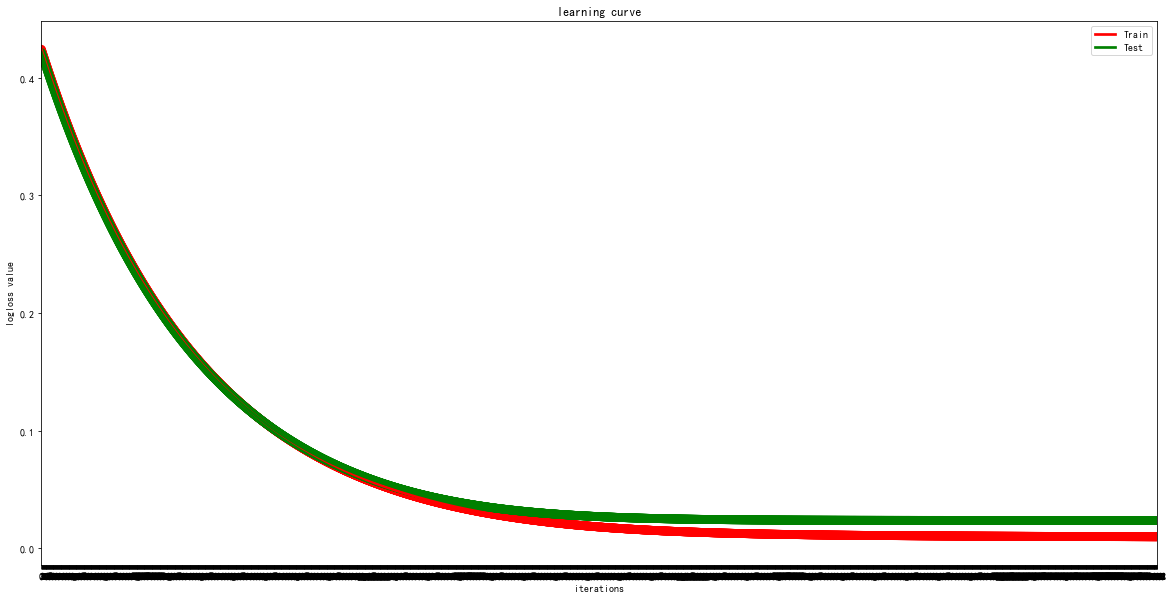

In [173]:
# dataframe of progress
f,ax=plt.subplots(1,1)
f.set_figheight(10)
f.set_figwidth(20)
df_performance=pd.DataFrame({"train":history["Training"]["rmse"],"test":history["Validation"]["rmse"]}).reset_index(drop=False)
sns.pointplot(ax=ax,y="train",x="index",data=df_performance,color="r")
sns.pointplot(ax=ax,y="test",x="index",data=df_performance,color="g")
ax.legend(handles=ax.lines[::len(df_performance)+1], labels=["Train","Test"])
plt.xlabel('iterations'); plt.ylabel('logloss value'); plt.title('learning curve')
#plt.savefig('E:\kaggle\jia\图片保存')

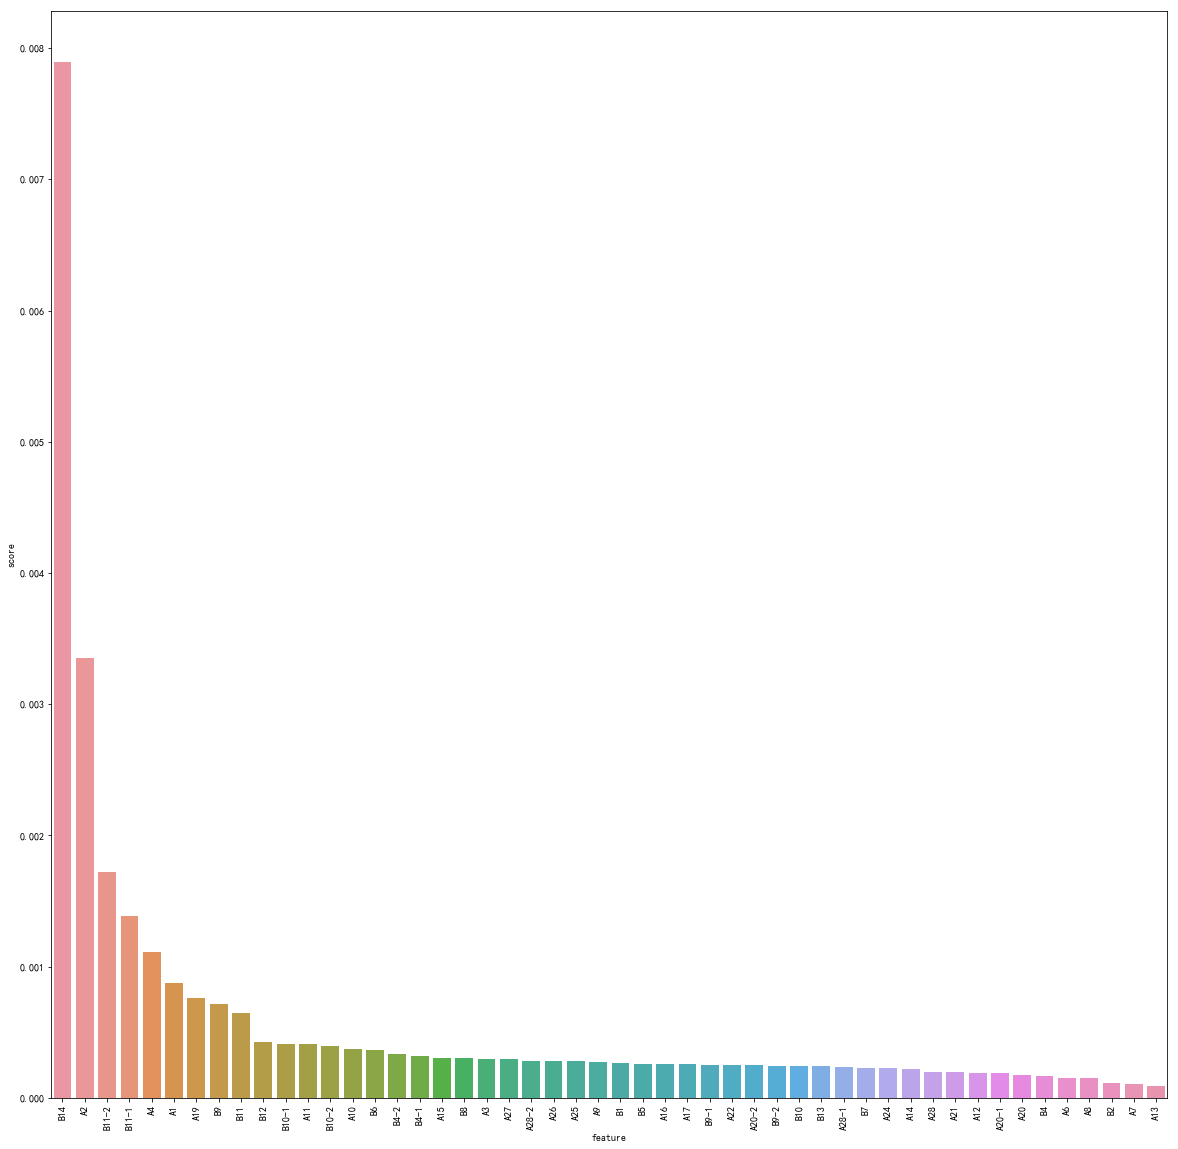

In [174]:
score=clf.get_score(importance_type="gain")
df=pd.DataFrame({"feature":list(score.keys()),"score":list(score.values())})
df=df.sort_values(by="score",ascending=False)
plt.figure(figsize=(20,20))
plt.xticks(rotation="vertical")
sns.barplot(x="feature",y="score",data=df,orient="v")
#plt.savefig('E:\\kaggle\\jia\\图片保存\\xgb.png')

In [175]:
# Checking rmse on test set (kept during data splitting)
from sklearn.metrics import mean_squared_error as mse
#pred_test = clf.predict(df_test)
#print(np.sqrt(score))

In [176]:
#模型数据保存